# SIR modell készítése
#### Anita és Ádám közös munkája

In [2]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import sympy as sym
from sympy.utilities.lambdify import implemented_function
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import seaborn as sns
#matplotlib.use('tkAgg')

In [3]:
t = sym.symbols('t')
S = sym.Function('S')(t)
I = sym.Function('I')(t)
R = sym.Function('R')(t)
beta = sym.symbols(u'β')
gamma = sym.symbols(u'γ')
dSdt=sym.Derivative(S,t)
dIdt=sym.Derivative(I,t)
dRdt=sym.Derivative(R,t)

eq1=sym.Equality(dSdt, -beta * S * I)
eq2=sym.Equality(dIdt, beta * S * I - gamma * I)
eq3=sym.Equality(dRdt,  gamma * I)

display(eq1,eq2,eq3)

Eq(Derivative(S(t), t), -β*I(t)*S(t))

Eq(Derivative(I(t), t), β*I(t)*S(t) - γ*I(t))

Eq(Derivative(R(t), t), γ*I(t))

In [5]:
pd.options.mode.chained_assignment = None

sir_data=pd.read_csv("sir_data.csv")
display(sir_data)
sir_countries=["Austria","Finland","Germany","Hungary","Ireland","European Union"]
sir_data=sir_data[sir_data["Country"].isin(sir_countries)]
sir_indexes=[sir_data[sir_data['Country'] == country].index[-1] for country in sir_countries]
for index in sir_indexes:
    sir_data['R0'][index]=float(sir_data['R0'][index][0:(sir_data['R0'][index]).find('±')])
for index in sir_indexes:
    sir_data['Δt'][index]=float(sir_data['Δt'][index][0:(sir_data['Δt'][index]).find('±')])
sir_data.insert(7, "Beta", [sir_data["R0"][index]/sir_data["Δt"][index] for index in sir_indexes], True)
for index in sir_indexes:
    temp=sir_data['Population'][index]
    sir_data['Population'][index]=int(temp.replace('.', '', temp.count('.')))

sir_data

,Country,Population,R0,Rt,t*,T,Δt
0,Austria,8.840.521,4.38±0.36,0.45±0.01,13.37±0.68,6.49±0.47,8.33±1.70
1,Belgium,11.433.256,5.00±0.73,0.54±0.03,13.31±2.84,19.30±1.57,4.00±2.35
2,Bulgaria,7.025.037,1.29±0.04,0.99±0.07,37.04±1.99,1.64±1.56,43.00±2.83
3,Croatia,4.087.843,0.93±0.22,0.49±0.03,22.36±2.90,2.46±3.61,27.33±2.36
4,Cyprus,1.189.265,3.35±1.14,0.50±0.02,6.60±2.87,8.02±1.47,14.00±0.00
5,Czech Republic,10.629.928,2.92±0.47,0.60±0.01,14.04±1.71,8.44±1.12,14.00±1.73
6,Denmark,5.793.636,2.00±0.05,0.81±0.01,24.74±0.29,1.72±0.45,24.00±2.92
7,Estonia,1.321.977,3.12±0.78,0.45±0.04,10.72±3.80,14.19±2.87,12.50±2.06
8,Finland,5.515.525,1.62±0.05,0.92±0.01,25.05±0.51,1.20±0.68,24.25±2.49
9,France,66.977.107,3.46±0.29,0.62±0.02,24.79±1.30,10.58±1.17,10.50±1.50


,Country,Population,R0,Rt,t*,T,Δt,Beta
0,Austria,8840521,4.38,0.45±0.01,13.37±0.68,6.49±0.47,8.33,0.525810
8,Finland,5515525,1.62,0.92±0.01,25.05±0.51,1.20±0.68,24.25,0.066804
10,Germany,82905782,6.33,0.58±0.01,17.06±1.39,12.41±0.71,3.25,1.947692
12,Hungary,9775564,1.97,0.37±0.15,25.62±6.55,20.23±7.33,31.67,0.062204
13,Ireland,4867309,1.94,0.57±0.03,30.78±0.53,5.94±1.28,30.0,0.064667
27,European Union,446786293,4.22,0.67±0.18,18.61±6.43,10.82±4.65,17.24,0.244780


In [6]:
def deriv(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]

In [7]:
def sircountry(country: int, infected: int, days: int):
    beta = sir_data["Beta"][country]
    gamma = 1/sir_data["Δt"][country]
    I_initial = infected/sir_data["Population"][country]
    R_initial = 0
    S_initial = 1-R_initial-I_initial
    x_initial = S_initial, I_initial, R_initial
    t = np.linspace(0, days, days*12)
    sol = odeint(deriv, x_initial, t, args=(beta, gamma))
    s, i, r = sol.T*sir_data["Population"][country]
    
    return [s, i, r]
    

In [8]:
def millions(x, pos):
    return '{:.1f}M'.format(x/1000000)

# Apply formatter to y axis
formatter = FuncFormatter(millions)

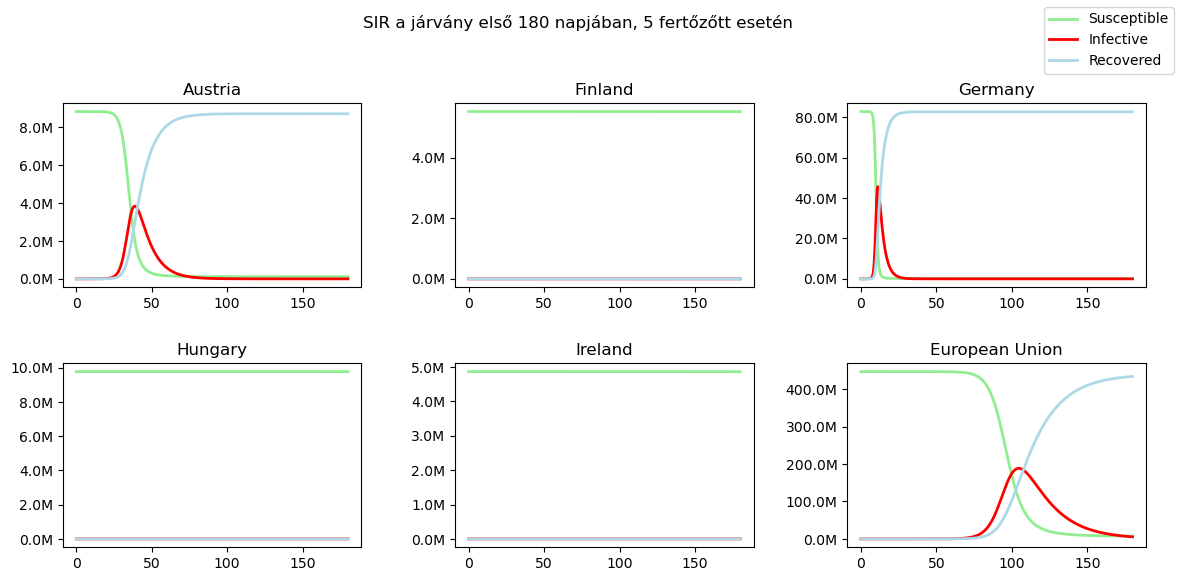

In [9]:
fig, axs = plt.subplots(2,3, figsize=(12,6))
counter=0
for i in range(0,2):
    for j in range(0,3):
        t = np.linspace(0, 180, 180*12)
        sir=sircountry(sir_indexes[counter],5,180)
        axs[i,j].plot(t, sir[0], lw=2, label='Susceptible', c='lightgreen')
        axs[i,j].plot(t, sir[1], lw=2, label='Infective', c='red')
        axs[i,j].plot(t, sir[2], lw=2, label='Recovered', c='lightblue')
        axs[i,j].set_title(f'{sir_countries[counter]}')
        axs[i,j].yaxis.set_major_formatter(formatter)
        
        counter+=1
        if counter==6:
            axs[1,2].legend()
            handles, labels = axs[1,2].get_legend_handles_labels()
            fig.legend(handles, labels, loc='upper right')
            axs[1,2].legend_ = None

fig.suptitle("SIR a járvány első 180 napjában, 5 fertőzőtt esetén")
fig.tight_layout(pad=2.3)

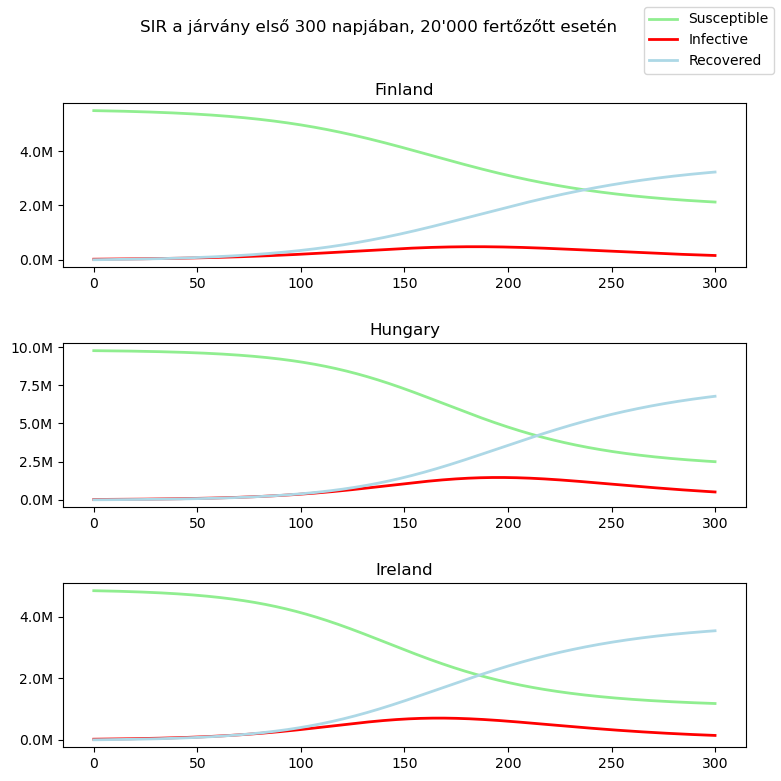

In [12]:
fig, axs = plt.subplots(3,1, figsize=(8,8))
subcountries_indexes=[8,12,13]
counter=0
for j in range(0,3):
    t = np.linspace(0, 300, 300*12)
    sir=sircountry(subcountries_indexes[counter],20000,300)
    axs[j].plot(t, sir[0], lw=2, label='Susceptible', c='lightgreen')
    axs[j].plot(t, sir[1], lw=2, label='Infective', c='red')
    axs[j].plot(t, sir[2], lw=2, label='Recovered', c='lightblue')
    axs[j].set_title(f'{sir_data["Country"][subcountries_indexes[counter]]}')
    axs[j].yaxis.set_major_formatter(formatter)
    counter+=1
    if counter==3:
            axs[2].legend()
            handles, labels = axs[2].get_legend_handles_labels()
            fig.legend(handles, labels, loc='upper right')
            axs[2].legend_ = None

fig.suptitle("SIR a járvány első 300 napjában, 20'000 fertőzőtt esetén")
fig.tight_layout(pad=2.3)